In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#df = pd.read_excel(r'F:\DOCUMENTOS\GIT\PC-Home\Estudos\Supera_Teste\bechdel.xlsx',sheet_name='bechdel') 
df = pd.read_excel('bechdel.xlsx')
df = df.drop(['Unnamed: 11','Unnamed: 10'], axis=1)
df = df.drop(0)
df.head(10)

,Year,IMDB code,Budget,Dom gross,Int Gross,Code,budget 2013 dollars,Dom gross 2013 dollars,Int gross 2013 dollars,Simple pass / fail
1,1974,tt0071562,13000000,57300000,57300000,1974PASS,61408439,270669505,270669505,PASS
2,1982,tt0084516,10700000,74706019,121706019,1982PASS,25821968,180285645,293709241,PASS
3,2008,tt0800241,15000000,2203641,6379575,2008PASS,16233845,2384904,6904335,PASS
4,2011,tt1625346,12000000,16311571,22750356,2011PASS,12428289,16893744,23562334,PASS
5,2000,tt0190590,26000000,45506619,75763814,2000FAIL,35175618,61566286,102501499,FAIL
6,2009,tt1232207,20000000,14363397,19121531,2009FAIL,21714632,15594794,20760850,FAIL
7,2007,tt0449088,300000000,309420425,960996492,2007PASS,337063045,347647302,1079721346,PASS
8,2009,tt0875034,80000000,19676965,53508858,2009FAIL,86858528,21363903,58096258,FAIL
9,2005,tt0369994,2000000,2072645,2077844,2005PASS,2386066,2472734,2478937,PASS
10,2002,tt0283139,16000000,16357770,21657770,2002PASS,20722867,21186244,28050694,PASS


In [3]:
# qtd total filmes
tot_mov = df['IMDB code'].count()
tot_mov

1500

In [4]:
# qtd filmes aprovados
tot_pass = df[df['Simple pass / fail'] == 'PASS']['IMDB code'].count()
tot_pass

672

In [5]:
# percentual filmes aprovados
perc_pass = ((tot_pass / tot_mov) * 100).round(2)
perc_pass

44.8

In [6]:
df1 = df[['Year','Simple pass / fail']]

In [7]:
# total filmes agrupados por ano
df2 = df1.groupby(['Year'])['Simple pass / fail'].count().reset_index()
df2 = df2.rename(columns={'Simple pass / fail':'tot'})
df2.head()

,Year,tot
0,1970,1
1,1971,4
2,1972,3
3,1973,5
4,1974,6


In [8]:
# total filmes aprovados por ano
df3 = (df1[df1['Simple pass / fail'] == 'PASS']).groupby(['Year'])['Simple pass / fail'].count().reset_index()
df3 = df3.rename(columns={'Simple pass / fail':'qtd_pass'})
df3.head()

,Year,qtd_pass
0,1970,1
1,1972,1
2,1973,1
3,1974,2
4,1976,2


In [9]:
# adicionada coluna de percentual de aprovados por ano
df4 = pd.merge(df2, df3, on='Year') 
df4['perc_pass'] = ((df4['qtd_pass'] / df4['tot']) * 100).round(2)
df4.head()

,Year,tot,qtd_pass,perc_pass
0,1970,1,1,100.00
1,1972,3,1,33.33
2,1973,5,1,20.00
3,1974,6,2,33.33
4,1976,6,2,33.33


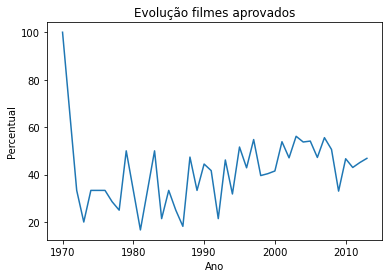

In [10]:
#Criando o gráfico de evolução dos filmes aprovados 
x = df4['Year']
y = df4['perc_pass']
plt.plot(x, y) 
plt.title('Evolução filmes aprovados') 
plt.xlabel('Ano')
plt.ylabel('Percentual')
plt.show()

In [17]:
#csv_test = pd.read_csv(r'F:\DOCUMENTOS\GIT\PC-Home\Estudos\Supera_Teste\test.csv', index_col=0) 
csv_test = pd.read_csv('test.csv')
csv_test.head()

,year,imdb,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013
0,2013,tt1559547,50000000,19452138.0,55940671.0,50000000,19452138.0,55940671.0
1,2013,tt0765446,40000000,57012977.0,66454811.0,40000000,57012977.0,66454811.0
2,2013,tt1211956,70000000,25213103.0,103813103.0,70000000,25213103.0,103813103.0
3,2013,tt1351685,195000000,65187603.0,197387603.0,195000000,65187603.0,197387603.0
4,2013,tt1650554,28000000,28795985.0,60839197.0,28000000,28795985.0,60839197.0


In [12]:
csv_test1 = csv_test

In [13]:
csv_test1.loc[csv_test1['budget'].astype(float) <= csv_test1['domgross']+csv_test1['intgross'], 'mdb'] = '1' 
csv_test1.loc[csv_test1['budget'].astype(float) > csv_test1['domgross']+csv_test1['intgross'], 'mdb'] = '0' 
csv_test1.head()

,imdb,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013,mdb
year,,,,,,,,
2013,tt1559547,50000000,19452138.0,55940671.0,50000000,19452138.0,55940671.0,1
2013,tt0765446,40000000,57012977.0,66454811.0,40000000,57012977.0,66454811.0,1
2013,tt1211956,70000000,25213103.0,103813103.0,70000000,25213103.0,103813103.0,1
2013,tt1351685,195000000,65187603.0,197387603.0,195000000,65187603.0,197387603.0,1
2013,tt1650554,28000000,28795985.0,60839197.0,28000000,28795985.0,60839197.0,1


In [14]:
csv_test1.groupby(['mdb'])['mdb'].count()

mdb
0     25
1    267
Name: mdb, dtype: int64